# K-nearest Neighbors
<span style="font-size: 12px;">By: Marisol Hernandez</span>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

## 1. Introduction to K-nearest Neighbors
**K-Nearest Neighbors (KNN)** is a simple, intuitive, and versatile machine learning algorithm used for both **<span style="color: red;">classification</span>** and **<span style="color: red;">regression</span>** tasks. It is a non-parametric and lazy learning algorithm, meaning it makes no assumptions about the underlying data distribution and performs little to no training but classifies data points at the time of prediction.

In KNN, a data point is classified or predicted based on the most classes or values of the `k` (where `k` is an integer) nearest data points in the feature space.

### Applications
- **Handwriting Recognition**: KNN can be used to recognize handwritten digits by comparing the pixel values of an unknown digit to the known digits. For instance, to classify a new handwritten digit, KNN finds the `k` nearest known digits in the dataset and assigns the most common digit among them as the prediction.

- **Recommender Systems**: To suggest new movies to a user, KNN identifies the `k` most similar users based on their viewing history and recommends movies that those users have liked.

- **Customer Spending Prediction**: To predict how much money a potential customer might spend, KNN can look at the spending habits of the `k` most similar customers and average their spending to make the prediction.

## 2. How KNN Works

1. **Selection of the value of** `k`: A value is chosen for `k`, which represents **the number of nearest data points** to be considered for classifying or predicting the new data point. A small value may lead to a noisier model sensitive to outliers, while a large value may smooth the decision boundaries.

2. **Distance Calculation**: The algorithm calculates the distance between the data point that needs to be classified/predicted and all other points in the training set. Common distance metrics include Euclidean, Manhattan, and Minkowski distances.

3. **Identification of the** `k` **nearest neighbors**: It then selects the `k` nearest neighbors to the data point. `k` is a user-defined constant.

4. **Prediction** 
    - **Majority Vote for <span style="color: red;">Classification</span>**: For classification tasks, the data point is assigned to the class most common among its `k` nearest neighbors.

    - **Averaging for <span style="color: red;">Regression</span>**: For regression tasks, the value of the data point is the mean of the values of its `k` nearest neighbors. An alternative to using mean as a metric is median.

It is important to note that the performance of this model can be highly dependent on the value of `k` and the choice of distance metric. In addition, it can be computationally expensive for large data sets, since it must compute the distance to all training points for each prediction:

<p align="center">
  <img src="imgs/knn1.png" alt="Alt text" width="600" height="350">
</p>

The value of `k` determines the number of nearest neighbors used to influence the prediction or classification outcome:

<p align="center">
  <img src="imgs/knn2.png" alt="Alt text" width="600" height="350">
</p>

As can be seen in the case of the figure, the value selected for `k` can bias a particular prediction towards the opposite or another one with slight changes. When `k=3`, the predicted class of the unknown datapoint would be a green triangle, <svg width="15" height="15" style="vertical-align: middle;">
  <polygon points="7.5,2.5 2.5,12.5 12.5,12.5" style="fill:green;stroke:black;stroke-width:1" />
</svg>. Whereas when `k=5`, the predicted class would be a blue square, <span style="display: inline-block; width: 15px; height: 15px; background-color: blue; vertical-align: middle;"></span>.

## 3. Distance Metrics
Distance metrics are functions used to measure the proximity or similarity between two data points in a KNN model. There are a large number of proposals, but the best known are the following:

### 3.1 Euclidean Distance
- **Definition**: Measures the straight-line distance between two points in Euclidean space. Suitable for numerical data.

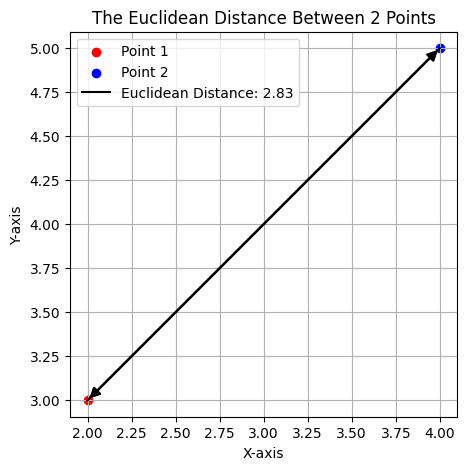

In [27]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Euclidean distance
euclidean_dist = distance.euclidean(point1, point2)

# Plot the points
plt.figure(figsize=(5, 5))
plt.scatter(point1[0], point1[1], color='red', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', label='Point 2')
plt.title('The Euclidean Distance Between 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot a line between the points to show Euclidean distance
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], linestyle='-', color='black', label=f'Euclidean Distance: {euclidean_dist:.2f}')

# Add arrows on both ends of the line
arrowprops = dict(arrowstyle='<|-|>', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=point1, xytext=point2, arrowprops=arrowprops)
plt.annotate('', xy=point2, xytext=point1, arrowprops=arrowprops)

# Prepare the legend 
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling

# Show the plot
plt.show()


- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Euclidean distance $d$ is calculated as:

$$d(p, q) = \sqrt{\sum^n_{i=1}(p_i-q_i)^2}$$

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$:

$$d(p, q) = \sqrt{\sum^2_{i=1}(p_i-q_i)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{(p_1-q_1)^2+(p_2-q_2)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{(2-4)^2+(3-5)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{2^2+(-2)^2}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{4+4}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= \sqrt{8}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~\approx 2.83$$

Using the Python `distance.euclidean` import,

In [68]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Euclidean distance
euclidean_dist = distance.euclidean(point1, point2)
euclidean_dist

2.8284271247461903

### 3.2 Manhattan Distance
- **Definition**: Also known as city block distance or taxicab distance, measures the sum of absolute differences between corresponding Cartesian coordinates of points. Suitable for numerical data as well.

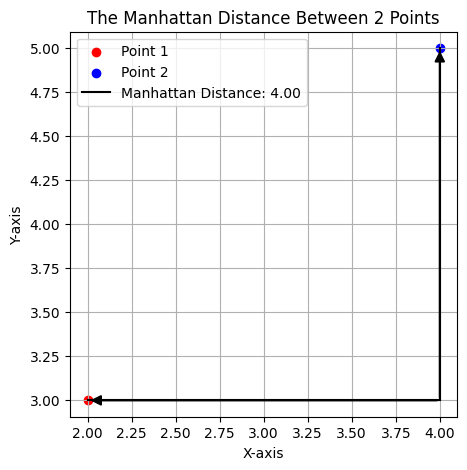

In [38]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Manhattan distance
manhattan_dist = distance.cityblock(point1, point2)

# Plot the points
plt.figure(figsize=(5, 5))
plt.scatter(point1[0], point1[1], color='red', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', label='Point 2')
plt.title('The Manhattan Distance Between 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot a line between the points to show Manhattan distance
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], linestyle='-', color='black')
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], linestyle='-', color='black', label=f'Manhattan Distance: {manhattan_dist:.2f}')

# Calculate midpoint for annotation
midpoint_x = (point1[0] + point2[0]) / 2
midpoint_y = (point1[1] + point2[1]) / 2

# Add arrows on both ends of the line
arrowprops = dict(arrowstyle='<|-', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=(point2[0], point1[1]), xytext=(point2[0], point2[1]), arrowprops=arrowprops)
arrowprops = dict(arrowstyle='-|>', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=(point1[0], point1[1]), xytext=(point2[0], point1[1]), arrowprops=arrowprops)

# Prepare the legend
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling

# Show the plot
plt.show()


- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Manhattan distance $d$ is calculated as:

$$d(p, q) = \sum^n_{i=1}|p_i-q_i|$$

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$:

$$d(p, q) = \sum^2_{i=1}|p_i-q_i|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= |p_1-q_1|+|p_2-q_2|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= |2-4|+|3-5|$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= 2+2$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= 4$$

Using the Python `distance.cityblock` import,

In [69]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Manhattan distance
manhattan_dist = distance.cityblock(point1, point2)
manhattan_dist

4

### 3.3 Minkowski Distance
- **Definition**: A generalized form that includes both Euclidean and Manhattan distances as special cases. It is parameterized by a parameter $p$.

- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Minkowski distance $d$ is calculated as:

$$d(p, q) = (\sum^n_{i=1}|p_i-q_i|^p)^{\frac{1}{p}}$$

where,

- When $p = 1$, it reduces to Manhattan distance.

- When $p = 2$, it reduces to Euclidean distance.

<p align="center">
  <img src="imgs/knn3.jpg" alt="Alt text" width="600" height="350">
</p>

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$ for parameter $p=1.5$:

$$d(p, q) = (\sum^n_{i=1}|p_i-q_i|^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= (|p_1-q_1|^{1.5}+|p_2-q_2|^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= (|2-4|^{1.5}+|3-5|^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~= (2^{1.5}+2^{1.5})^{\frac{1}{1.5}}$$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~\approx 5.66^{\frac{1}{1.5}} $$

$$~~~~~~~~~~~~~~~~~~~~~~~~~~~\approx 3.17 $$

Using the Python `distance.minkowski` import,

In [54]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Minkowski distance with p=1.5 (you can change the value of p)
p = 1.5
minkowski_dist = distance.minkowski(point1, point2, p)
minkowski_dist

3.1748021039363987

### 3.4 Chebyshev Distance
- **Definition**: Measures the maximum absolute difference between the coordinates of two points.

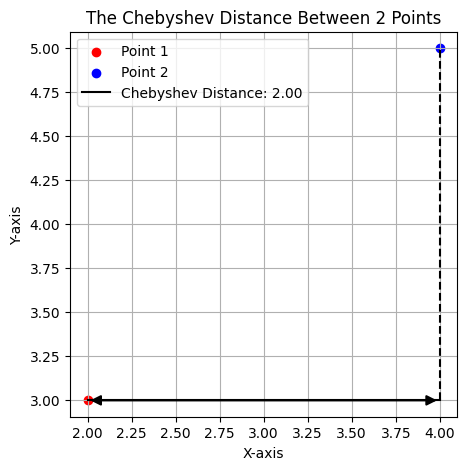

In [67]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Chebyshev distance
chebyshev_dist = distance.chebyshev(point1, point2)

# Plot the points
plt.figure(figsize=(5, 5))
plt.scatter(point1[0], point1[1], color='red', label='Point 1')
plt.scatter(point2[0], point2[1], color='blue', label='Point 2')
plt.title('The Chebyshev Distance Between 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot a line between the points to show Chebyshev distance
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], linestyle='-', color='black', label=f'Chebyshev Distance: {chebyshev_dist:.2f}')
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], linestyle='--', color='black')

# Calculate midpoint for annotation
midpoint_x = (point1[0] + point2[0]) / 2
midpoint_y = (point1[1] + point2[1]) / 2

# Add arrows on both ends of the line
arrowprops = dict(arrowstyle='<|-|>', color='black', linewidth=1.5, mutation_scale=15)
plt.annotate('', xy=(point1[0], point1[1]), xytext=(point2[0], point1[1]), arrowprops=arrowprops)

# Prepare the legend
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling

# Show the plot
plt.show()

- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Chebyshev distance $d$ is calculated as:

$$d(p, q) = \text{max}(|p_i-q_i|)$$

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$

$$d(p, q) = \text{max}(|p_i-q_i|)$$

$$= \text{max}(|2-4|, |3-5|)$$

$$= \text{max}(|2|, |-2|)$$

$$= \text{max}(2, 2)$$

$$= 2$$

Using the Python `distance.chebyshev` import,

In [70]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate Chebyshev distance
chebyshev_dist = distance.chebyshev(point1, point2)
chebyshev_dist

2

### 3.5 Cosine Similarity (Distance)
- **Definition**: Measures the cosine of the angle between two vectors.

<p align="center">
  <img src="imgs/knn4.png" alt="Alt text" width="250" height="250">
</p>

- **Formula**: For two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$, the Cosine Similarity, $\text{similarity}$, is calculated as:

$$\text{similarity}(p, q) = \frac{p\cdot q}{||p||~||q||}$$

$$= \frac{\sum_{i=1}^n{p_iq_i}}{\sqrt{\sum_{i=1}^n{p_i^2}}\sqrt{\sum_{i=1}^n{q_i^2}}}$$

where $p\cdot q$ is the dot product and $||p||$ and $||q||$ are the norms of $p$ and $q$ respectively.

Let's use the formula to validate the Euclidean distance between the two data points, $p = (2, 3)$ and $q = (4, 5)$

$$\text{similarity}(p, q) = \frac{p\cdot q}{||p||~||q||}$$

$$= \frac{\sum_{i=1}^2{p_iq_i}}{\sqrt{\sum_{i=1}^2{p_i^2}}\sqrt{\sum_{i=1}^2{q_i^2}}}$$

$$= \frac{(p_1 \times q_1)+(p_1 \times q_1)}{\sqrt{p_1^2+p_2^2}\sqrt{q_1^2+q_2^2}}$$

$$= \frac{(2\times4)+(3\times5)}{\sqrt{2^2+3^2}\sqrt{4^2+5^2}}$$

$$= \frac{8+15}{\sqrt{4+9}\sqrt{16+25}}$$

$$= \frac{23}{\sqrt{13}\sqrt{41}}$$

$$\approx 0.9962$$

Using the Python `sklearn.metrics.pairwise.cosine_similarity` import,

In [99]:
# Define the coordinates of the two points
point1 = np.array([2, 3])
point2 = np.array([4, 5])

# Calculate cosine similarity
cosine_sim = cosine_similarity(point1.reshape(1,-1), point2.reshape(1,-1))[0][0]
cosine_sim

0.9962405881956831

### 3.6 Hamming Distance
- **Definition**: Calculates the number of positions at which corresponding symbols differ between two strings of equal length.

<p align="center">
  <img src="imgs/knn5.png" alt="Alt text" width="250" height="250">
</p>

- **Formula**: For strings $p$ and $q$ of length $n$ (same length), Hamming distance $d$ is given by,

$$d(p, q) = \sum^n_{i=1}\delta(p_i, q_i)$$

where $\delta(p_i, q_i)$ equals 0 if $p_i=q_i$ and 1 otherwise.

In [105]:
# Calculate Hamming distance between "Golang" and "Gopher"
str1 = "Golang"
str2 = "Gopher"
hamming_dist = distance.hamming(list(str1), list(str2)) * len(str1)  # Multiply by length to get actual distance
hamming_dist

4.0

### 3.7 Distance Metrics Comparison
<p align="center">
  <img src="imgs/knn6.png" alt="Alt text" width="650" height="400">
</p>

## 4. KNN for Classification

## 5. KNN for Regression